In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython

# Generate some test data
x = np.linspace(1, 21, 1001).reshape(-1, 1)
y = np.sin(x)

# Reshape the data to fit the LSTM model
x = x.reshape((len(x), 1, 1))
y = y.reshape((len(y), 1, 1))

# Split the data into training sets
x_train = np.array([x[i:i+10] for i in range(len(x)-10)]).reshape(-1, 10, 1)
y_train = np.array([y[i+10] for i in range(len(y)-10)]).reshape(-1, 1)

# Create the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20, activation='tanh', return_sequences=True, input_shape=(10, 1))),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=20, activation='tanh')),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=16)

# Generate new predictions
x_pred = x_train[-1, 1:].reshape(1, 9, 1)
predictions = []
for i in range(10):
    x_pred = np.concatenate((x_pred[:, -9:], y_train[-1].reshape(1, 1, 1)), axis=1)
    y_pred = model.predict(x_pred)[0][0]
    predictions.append(y_pred)
    x_pred = np.concatenate((x_pred[:, 1:], y_pred.reshape(1, 1, 1)), axis=1)

IPython.display.clear_output()

In [ ]:
# Plot the results
plt.plot(x[:, 0], y[:, 0], label='Original data')
plt.plot(np.linspace(11, 21, 10), predictions, label='Predicted data')
plt.legend()
plt.show()

In [ ]:
x = np.linspace(1, 21, 1001).reshape(-1, 1)
x_train

In [1]:
import tensorflow as tf
import numpy as np

# Define the hyperparameters
time_steps = 10
input_dim = 1
hidden_dim = 32
output_dim = 1

# Define the input and output placeholders
inputs = tf.keras.layers.Input(shape=(time_steps, input_dim))
outputs = tf.keras.layers.Dense(output_dim)(inputs)

# Define the LSTM layer
lstm_layer = tf.keras.layers.LSTM(hidden_dim, return_sequences=True)(inputs)

# Define the output layer
output_layer = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(output_dim))(lstm_layer)

# Define the model
model = tf.keras.models.Model(inputs=inputs, outputs=output_layer)

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Generate some dummy data
x_train = np.random.randn(100, time_steps, input_dim)
y_train = np.random.randn(100, time_steps, output_dim)

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test set
x_test = np.random.randn(10, time_steps, input_dim)
y_pred = model.predict(x_test)

Epoch 1/100
4/4 [==============================] - 2s 68ms/step - loss: 0.9927
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9908
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9903
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9892
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9881
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9872
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9867
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9861
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9857
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9854
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9851
Epoch 12/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9846
Epoch 13/100
4/4 [==============================]

In [37]:
import tensorflow as tf
import numpy as np
import IPython

# Define the hyperparameters
time_steps = 1
input_dim = 1
hidden_dim = 32
output_dim = 1

# Define the input and output placeholders
inputs = tf.keras.layers.Input(shape=(time_steps, input_dim))
outputs = tf.keras.layers.Dense(output_dim)(inputs)

# Define the LSTM layer
lstm_layer = tf.keras.layers.LSTM(hidden_dim, return_sequences=True)(inputs)

# Define the output layer
output_layer = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(output_dim))(lstm_layer)

# Define the model
model = tf.keras.models.Model(inputs=inputs, outputs=output_layer)

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Generate some dummy data
x_train = np.random.randn(100, time_steps, input_dim)
y_train = np.sin(x_train)**2

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make autoregressive predictions on the test set
# Define the input sequence
x_test = np.arange(10*time_steps*input_dim).reshape((10, time_steps, input_dim))

# Predict the next 10 time steps
y_pred = []
x_pred = x_test[:, 0:1, :]
for i in range(10):
    # Reshape the input data
    x_pred = np.reshape(x_pred, (1, 10, 1))
    # Predict the next time step
    y_hat = model.predict(x_pred)
    y_pred.append(y_hat[:, -1, :])
    # Update the input sequence with the predicted value
    x_pred = np.concatenate([x_pred[:, 1:, :], y_hat[:, -1:, :]], axis=1)

# Convert the list of predictions to a numpy array
y_pred = np.concatenate(y_pred, axis=1)

IPython.display.clear_output()
print(y_pred)

Epoch 1/100
4/4 [==============================] - 2s 122ms/step - loss: 0.2928
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 0.2807
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2685
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2572
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.2464
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2360
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2258
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2174
Epoch 9/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2086
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2003
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1926
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1842
Epoch 13/100
4/4 [==============================

ValueError: in user code:

    File "/Users/guneraygin/miniconda3/envs/env_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/guneraygin/miniconda3/envs/env_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/guneraygin/miniconda3/envs/env_tf/lib/python3.8/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/guneraygin/miniconda3/envs/env_tf/lib/python3.8/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/guneraygin/miniconda3/envs/env_tf/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/guneraygin/miniconda3/envs/env_tf/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_26" is incompatible with the layer: expected shape=(None, 1, 1), found shape=(None, 10, 1)


In [42]:
import tensorflow as tf
import numpy as np
import IPython
import matplotlib.pyplot as plt

# Define the hyperparameters
time_steps = 1
input_dim = 1
hidden_dim = 32
output_dim = 1

# Define the input and output placeholders
inputs = tf.keras.layers.Input(shape=(time_steps, input_dim))
outputs = tf.keras.layers.Dense(output_dim)(inputs)

# Define the LSTM layer
lstm_layer = tf.keras.layers.LSTM(hidden_dim, return_sequences=True)(inputs)

# Define the output layer
output_layer = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(output_dim))(lstm_layer)

# Define the model
model = tf.keras.models.Model(inputs=inputs, outputs=output_layer)

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Generate some dummy data
x_train = np.linspace(0,100,100).reshape(-1,1)
y_train = np.sin(x_train)**2

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Make autoregressive predictions on the test set
# Define the input sequence
x_test = np.arange(10*time_steps*input_dim).reshape((10, time_steps, input_dim))
y_actual = np.sin(x_test)**2
#y_actual[:, 0, :] = np.sin(x_test[:, 0, :])**2

# Predict the next 100 time steps
y_pred = []
length = 100
for i in range(1, length):
    # Reshape the input data
    x_pred = x_test[:, i:i+1, :]
    x_pred = np.reshape(x_pred, (1, 10, 1))
    # Predict the next time step
    y_hat = model.predict(x_pred)
    y_pred.append(y_hat[:, -1, :])
    # Update the input sequence with the predicted value
    y_actual[:, i:i+1, :] = y_hat[:, -1:, :]

# Convert the list of predictions to a numpy array
y_pred = np.concatenate(y_pred, axis=1)
IPython.display.clear_output()

# Plot the results
plt.plot(y_actual.flatten(), label='Actual')
plt.plot(y_pred.flatten(), label='Predicted')
plt.legend()
plt.show()

Epoch 1/100
4/4 [==============================] - 2s 46ms/step - loss: 0.1919
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 0.1611
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1430
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1348
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.1357
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1358
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1334
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1306
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1299
Epoch 10/100
4/4 [==============================] - 0s 27ms/step - loss: 0.1304
Epoch 11/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1311
Epoch 12/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1310
Epoch 13/100
4/4 [==============================]

ValueError: cannot reshape array of size 0 into shape (1,10,1)

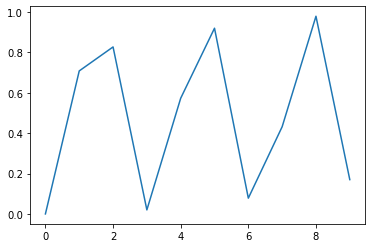

In [43]:
plt.plot(x_test.flatten(), y_actual.flatten())